<img src="ppgec.png" alt="drawing" width="100" align="right" />

**Universidade Federal do Rio Grande do Sul**

**Programa de Pós-Graduação em Engenharia Civil**

---
## Vibrações I
### Aula 07: Vibrção forçada.

*Profa. Dra. Letícia Fleck Fadel Miguel*

*Daniel B. M. Matos*

---


In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Vibração forçada harmonicamente

De forma simplificada, os carregamentos harmônicos serão definidos como funções seno e cosseno, como exposto abaixo:

\begin{align}
F = f_0 \sin{\omega t}\\
F = f_0 \cos{\omega t}
\end{align}

Usando a função seno como exemplo, é possível escrever a equação do movimento da seguinte forma:

\begin{align}
m\ddot{u}(t) + c\dot{u}(t) + ku(t) = f_0 \sin{\omega t}
\end{align}








Dessa forma, é possível resolver esta equação diferencial separando-a em duas soluções: solução homogênea e solução particular.

\begin{align}
u(t) = u_{homogênea} + u_{particular}
\end{align}

A solução homogêna consiste na resolucão de um sistema em vibração livre, enquanto a solução particular será feita a partir do teorema da preservação da frequência, onde a frequência da resposta terá mesma frequência de oscilação do carregamento externo.

## 1.1 Sistema não amortecido

Num sistema sem amortecimento, a equação de equilíbrio pode ser escrita por:
\begin{align}
m\ddot{u}(t) + ku(t) = f_0 \sin{\omega t}
\end{align}

 Aresposta homogêna pode ser escrita por:
 
 \begin{align}
 u_{homogênea} = A \cos{\omega_n t} + B \sin{\omega_n t}
 \end{align}
 
 Enquanto a solução particular será dada pelo teorema da preservação da frequência:
 
\begin{align}
u_{particular} = C \sin{\omega t}
\end{align}



Substituindo a solução particular na equação de equilíbrio, é possível descobrir a constante C:

\begin{align*}
-m \omega^2C\sin{\omega t} + kC \sin{\omega t} &= f_0 \sin{\omega t} \\
-m \omega^2 C + kC &= f_0 \\
-\frac{\omega^2}{\omega_n^2} C + C &= \frac{f_0}{k} \\
\end{align*}
Apresentando o termo $\beta$ como:

\begin{align}
\beta &= \frac{\omega}{\omega_n} \\
\end{align}









É possível definir a constante C:

\begin{align}
C                  &= \frac{f_0}{k} \left(\frac{1}{1 - \beta^2}\right)
\end{align}

É importante observar que o termo $ \frac{f_0}{k}$ corresponde ao deslocamento estático do sistema.



Agora, é possível escrever a equação geral como:

\begin{align}
u(t) = A \cos{\omega_n t} + B \sin{\omega_n t} + \frac{f_0}{k} \left(\frac{1}{1 - \beta^2}\right) \sin{\omega t}
\end{align}

Onde as constantes A e B podem ser definidas a partir dos valores iniciais do sistema $u(0)$ e $ \dot{u}(0)$. Para um sistema com valores iniciais nulos $ u(0) = \dot{u}(0) = 0$, as constantes serão:
\begin{align}
A &= 0 \\ 
B &= -\frac{f_0 \beta}{k}\left(\frac{1}{1 - \beta^2}\right)
\end{align}

Sendo possível, agora, definir a expressão do deslocamento:

\begin{align}
u(t) = \frac{f_0}{k}\left(\frac{1}{1 - \beta^2}\right) (\sin{\omega t} - \beta\sin{\omega_n t})
\end{align}

Com isso, é possível perceber que o deslocamento pode ser escrito em fução do seu deslocamento estático:

\begin{align}
u(t) = u_{est} R(t)
\end{align}

em que $R(t)$ é a função de ganho, que pode ser escrita por:

\begin{align}
R(t) = \left(\frac{1}{1 - \beta^2}\right) (\sin{\omega t} - \beta\sin{\omega_n t})
\end{align}

In [32]:
# Fenômeno do batimento
F0 = 1000                                                      # Amplitude da força
wn = 3                                                         # Frequência natural
w  = 2.9                                                       # Frequência da oscilação
beta = w/wn
m  = 200                                                       # Massa do sistema
k  = wn**2 * m                                                 # Rigidez
ust = F0/k                                                     # Deslocamento estático
t = np.linspace(0,250,1000)
R = (1/(1-beta**2))*(np.sin(w*t) - beta*np.sin(wn*t))          # Função de ganho
u = ust*R                                                      # Deslocamento

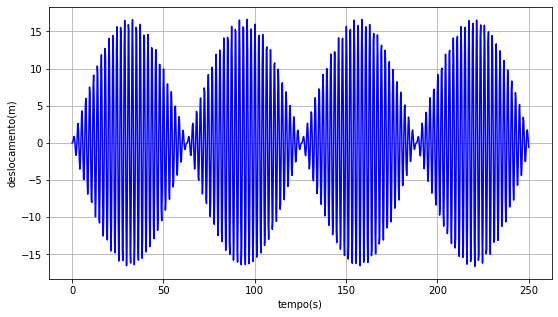

In [33]:
plt.figure(1,figsize = (9,5))
plt.plot(t,u,'b')
plt.xlabel('tempo(s)') ; plt.ylabel('deslocamento(m)')
plt.grid(True)

## Sistema amortecido 

No caso de um sistema amortecido, o mesmo procedimento deve ser realizado para a resolução da equação de equilíbrio dinâmico.

\begin{align}
m\ddot{u}(t) + c \dot{u} + ku(t) = f_0 \sin{\omega t}
\end{align}

A solução homogênea é igual a de um sistema em vibracão livre amortecida, podendo ser escrita como:

\begin{align}
u_{homogênea} = e^{-\zeta\omega_nt}(A\cos{\omega_nt} + B\sin{\omega_nt})
\end{align}


Já a solução particular será dada pelo teorema da preservação da frequência:

\begin{align}
u_{particular} = G_1\cos{\omega t} + G_2\sin{\omega t}
\end{align}

Substituindo a solução particular na equação de equilíbrio dinâmico, é possível obter as constantes $G_1$ e $G_2$.

\begin{align}
G_1 &= \frac{f_0}{k}\left(\frac{-2 \zeta \beta}{(1- \beta^2)^2 + (2 \zeta \beta)^2}\right) \\
G_2 &= \frac{f_0}{k}\left(\frac{1 - \beta^2}{(1- \beta^2)^2 + (2 \zeta \beta)^2}\right)
\end{align}





Portanto, a resposta total pode ser dada por:

\begin{align}
u(t) = e^{-\zeta\omega_nt}(A\cos{\omega_nt} + B\sin{\omega_nt}) + \\
\frac{f_0}{k}\left(\frac{1}{(1- \beta^2)^2 + (2 \zeta \beta)^2}\right)\left[(1- \beta^2)\sin{\omega t}- 2 \zeta \beta\cos{\omega t}\right]
\end{align}

O primeiro termo da expressão é chamado de estado transiente, que perderá sua importância com o tempo, visto que o amortecedor diminui a amplitude da resposta. Já o segundo termo é chamado de estado harmônico, que continuará indefinidamente. Ignorando a parcela transiente e transformado a soma $ \sin{\omega t} + \cos{\omega t}$ em $ \sin{(\omega t + \theta)}$, escreve-se a equação da seguinte forma:

\begin{align}
u(t) &= \rho \sin{(\omega t + \theta)} \\
\end{align}

em que $\rho$ e $\theta$ são, respectivamente a amplitude do movimento e o ângulo de fase, que podem ser escritos por:
\begin{align}
\rho   &= \frac{f_0}{k}\sqrt{\frac{1}{(1- \beta^2)^2 + (2 \zeta \beta)^2}} \\
\theta &= \tan^{-1}\left[\frac{2\zeta \beta}{1-\beta^2}\right]
\end{align}

Observando agora que o pico de deslocamento ocorrerá quando $\sin{(\omega t + \theta)} = 1$ e que $\frac{f_0}{k} = u_{est}$, pode-se calcular o máximo deslocamento do sistema a partir da relação:
\begin{align}
u_{dyn} &= A  u_{est} \\
A       &= \sqrt{\frac{1}{(1-\beta^2)^2 + (2\zeta\beta)^2)}}
\end{align}

Onde A é o fator de amplificação dinâmico.

Analisando o fator de amplificação em função de $\beta$, é possível visualizar a influência da frequência do carregamento no deslocamento máximo do sistema, assim como a influência do fator de amortecimento.

In [4]:
wn = 3
z  = [0.000001,0.01,0.03,0.1,0.3,0.5,1]
w  = np.linspace(0,10,1000)
beta = w/wn

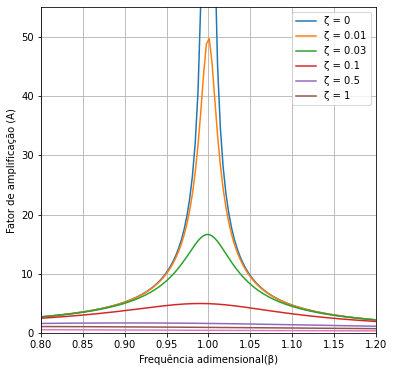

In [5]:
plt.figure(2,figsize=(6,6))
plt.xlim(0.8,1.2) ; plt.ylim(0,55)
for i in z:
    A = np.sqrt(1/((1-beta**2)**2 + (2*i*beta)**2))
    plt.plot(beta,A)
    plt.legend(('ζ = 0','ζ = 0.01','ζ = 0.03','ζ = 0.1','ζ = 0.5','ζ = 1'))
    plt.xlabel('Frequência adimensional(β)') ; plt.ylabel('Fator de amplificação (A)')
    plt.grid(True)

Percebam que o máximo fator de amplificação, independente do valor de $\zeta$ ocorre quando $\omega = \omega_n$, ou seja, $\beta = 1$. Isto ocorre porque o sistema entrou em **ressonância**.

##  Ressonância

O fenômeno de ressonância ocorre quando o sistema recebe o máximo de energia proviniente da excitação externa. Nos gráficos acima, é possível observar que o pico de deslocamento ocorre quando $\beta$ é igual a 1, ou seja, quando a frequência de excitação é igual a frequência natural do sistema.

No caso de um sistema não amortecido, como não há dissipação de energia, um carregamento ressonante acarreta num fator de amplificação infinito. Para observar este fenômeno, observe o gráfico abaixo:

In [6]:
F0 = 1000
wn = 2
w  = 1.9999999
beta = w/wn
m  = 2
k  = wn**2 * m
ust = F0/k
t = np.linspace(0,200,1000)
R = (1/(1-beta**2))*(np.sin(w*t) - beta*np.sin(wn*t))
u = ust*R


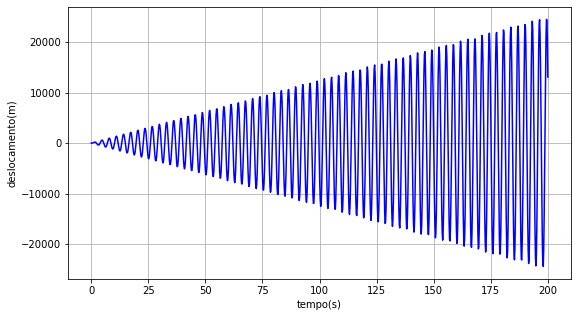

In [7]:
plt.figure(3,figsize = (9,5))
plt.plot(t,u,'b')
plt.xlabel('tempo(s)') ; plt.ylabel('deslocamento(m)')
plt.grid(True)

No caso de um sistema amortecido em ressonância, a equação do deslocamento, considerando a parcela transiente com valores iniciais nulos $ u(0) = \dot{u}(0) = 0$, pode ser escrita por

\begin{align}
u(t) = e^{-\zeta\omega_nt}\left(\frac{f_0}{2k\zeta}\cos{\omega_nt} + \frac{f_0}{2k\sqrt{1-\zeta^2}}\sin{\omega_nt}\right) - \frac{f_0}{k} \frac{\cos{\omega t}}{2\zeta}
\end{align}

Observe o gráfico abaixo onde o fator de amplificação pode ser facilmente identificado pela relação:

\begin{align}
A = \frac{1}{2\zeta}
\end{align}

In [8]:
t = np.linspace(0,300,10000)
z     = 0.01
wn    = 2
w     = 2
u1    = F0/2/k/z *np.cos(wn*t)
u2    = F0/2/k/np.sqrt(1-z**2)*np.sin(wn*t)
u3    = F0/k/2/z* np.cos(w*t)

u_z   = np.exp(-z*wn*t)*(u1+u2)- u3
A     = np.ones(len(t))/2/z


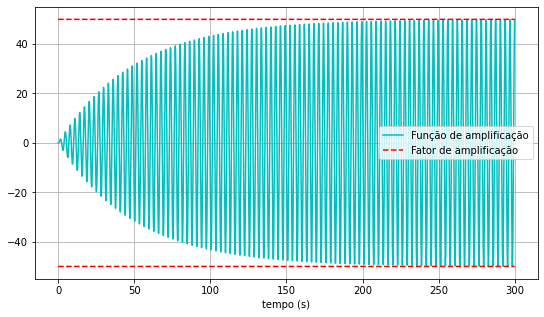

In [9]:
plt.figure(4,figsize=(9,5))
plt.plot(t,u_z/ust,'c')
plt.plot(t,A,'r--',t,-A,'r--')
plt.xlabel('tempo (s)')
plt.legend(('Função de amplificação','Fator de amplificação'))
plt.grid(True)

In [10]:
print(' ---------------------------------------','\n'
      ' Deslocamento estático:           {}m'.format(ust),'\n'
      ' Fator de amplificação:             {0:.1f}'.format(A[0]),'\n',
      'Deslocamento dinâmico:            {0:.0f}m'.format(np.max(u_z)),'\n',
      '--------------------------------------')

 --------------------------------------- 
 Deslocamento estático:           125.0m 
 Fator de amplificação:             50.0 
 Deslocamento dinâmico:            6234m 
 --------------------------------------
